<a href="https://colab.research.google.com/github/phaninandula/phaninandula-END3-session1/blob/main/Session3_Pytorch101_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required libraries

In [1]:
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

## Checking for GPU

In [2]:
print(torch.cuda.is_available())  # Checks if GPU is available
print(torch.cuda.get_device_name(0)) # Name of GPU
print(torch.cuda.device_count())
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

True
Tesla K80
1


# Importing MNIST dataset from pytorch

In [3]:
mnist_train = datasets.MNIST('../data',train=True,download=True,transform=transforms.Compose([transforms.ToTensor()])) # Train dataset
mnist_test = datasets.MNIST('./data',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()])) # Test dataset

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Plotting few samples of the downloaded data

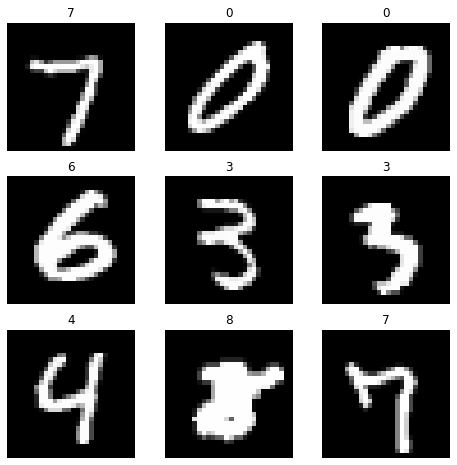

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_train), size=(1,)).item()
    img, label = mnist_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
#dir(mnist_train)

## Checking the size of the image, label and image information

In [6]:
for im,la in mnist_train:
  print(f'image : {im}')
  print(f'label : {la}')
  print(f'shape of image : {im.shape}')
  break

image : tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [7]:
# Number of images in training and testing 
len(mnist_train), len(mnist_test)

(60000, 10000)

In [8]:
print(dir(mnist_train))
#mnist_train.train_labels

print(f'Number of examples in training dataset :{len(mnist_train)}')
print('\n')
print(f'Shape of the training dataset - images : {mnist_train.train_data.shape}')
print('\n')
print(f'Labels in the training dataset : {mnist_train.train_labels}')
print('\n')

['__add__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_exists', '_check_legacy_exist', '_format_transform_repr', '_load_data', '_load_legacy_data', '_repr_indent', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'mirrors', 'processed_folder', 'raw_folder', 'resources', 'root', 'target_transform', 'targets', 'test_data', 'test_file', 'test_labels', 'train', 'train_data', 'train_labels', 'training_file', 'transform', 'transforms']
Number of examples in training dataset :60000


Shape of the training dataset - images : torch.Size([60000, 28, 28])


Labels in the training dataset

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


# Creating training and testdata for random numbers

In [9]:
### Training & Testing #############################################
def rand_num(min_num,max_num,data_size):
  rand_num_label = torch.randint(min_num,max_num,(data_size,))
  rand_num_one_hot = F.one_hot(rand_num_label)
  return rand_num_label,rand_num_one_hot

rand_num_train_label, rand_num_train_one_hot = rand_num(0,10,len(mnist_train))
rand_num_test_label, rand_num_test_one_hot = rand_num(0,10,len(mnist_test))

# rand_num_train_label = torch.randint(0,10,(len(mnist_train),))
# rand_num_train = F.one_hot(rand_num_train_label)    
# rand_num_test_label = torch.randint(0,10,(len(mnist_test),))
# rand_num_test = F.one_hot(rand_num_test_label)

In [10]:
rand_num_train_label.shape, rand_num_train_one_hot.shape, rand_num_test_label.shape, rand_num_test_one_hot.shape

(torch.Size([60000]),
 torch.Size([60000, 10]),
 torch.Size([10000]),
 torch.Size([10000, 10]))

## Creating Actual Final Outputs of the newtork both for Training and Testing

In [11]:
training_image_labels = mnist_train.train_labels
training_sum_labels = mnist_train.train_labels + rand_num_train_label
training_sum_labels_onehot = F.one_hot(training_sum_labels)

print(f'Training data image number  : {training_image_labels}')
print(f'Training data random number  : {rand_num_train_label}')
print(f'Training data sum number : {training_sum_labels}')
print('\n')
########## Test labels ###########################
testing_image_labels = mnist_test.test_labels
testing_sum_labels = mnist_test.test_labels + rand_num_test_label
testing_sum_labels_onehot = F.one_hot(testing_sum_labels)

print(f'Testing data image number  : {testing_image_labels}')
print(f'Testing data random number  : {rand_num_test_label}')
print(f'Testing data sum number : {testing_sum_labels}')
print('\n')

Training data image number  : tensor([5, 0, 4,  ..., 5, 6, 8])
Training data random number  : tensor([5, 0, 3,  ..., 5, 9, 4])
Training data sum number : tensor([10,  0,  7,  ..., 10, 15, 12])


Testing data image number  : tensor([7, 2, 1,  ..., 4, 5, 6])
Testing data random number  : tensor([5, 7, 1,  ..., 9, 8, 3])
Testing data sum number : tensor([12,  9,  2,  ..., 13, 13,  9])




/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [12]:
training_sum_labels_onehot[0].shape, testing_sum_labels_onehot[0].shape

(torch.Size([19]), torch.Size([19]))

# Fully Connected Network only

## Converting images to single vector

In [13]:
def images_to_vector(data):
  ''' 
  Converts 2d image tensor to 1d tensor 
  
  Input: data --> contains the information aboue the image and its corresponding label

  Output: img2vector --> tensor of size [Total_num_images, height_of_image * width_of_image]

  '''
  
  img2vector = []
  for images,labels in data:
    img2vector.append(images.reshape(1,-1)) # list of tensors of shape [1,784]
  img2vector = torch.stack(img2vector) # Stack converts a list of tensors in to a single tensor
  print(f' length : {len(img2vector)}, shape of tensor {img2vector.shape}')
  img2vector = torch.squeeze(img2vector) # Squeeze the tensor 
  print(f'img2vector shape after squeezing : {img2vector.shape}')
  print('\n')
  return img2vector

print("Training Data")
train_images = images_to_vector(mnist_train)

print("Testing Data")
test_images = images_to_vector(mnist_test)

Training Data
 length : 60000, shape of tensor torch.Size([60000, 1, 784])
img2vector shape after squeezing : torch.Size([60000, 784])


Testing Data
 length : 10000, shape of tensor torch.Size([10000, 1, 784])
img2vector shape after squeezing : torch.Size([10000, 784])




# TEst data

In [14]:
# test_images = []
# #i=0
# for im,la in mnist_test:
#   test_images.append(im.reshape(1,-1)) # list of tensors of shape [1,784]
#   #i += 1

# test_images = torch.stack(test_images) # Stack converts a list of tensors in to a single tensor
# print(f' length : {len(test_images)}, shape of tensor {test_images.shape}')

## Concatenate the random number (one hot encoding) and Image data which is used as input to our Neural Network

In [15]:
# Training Inputs
train_final = torch.cat((train_images,rand_num_train_one_hot),axis=1)
train_final.shape # This is the final shape of the input that is passed to our Fully connected netowrk

torch.Size([60000, 794])

In [16]:
#Testing Inputs
test_final = torch.cat((test_images,rand_num_test_one_hot),axis=1)
test_final.shape

torch.Size([10000, 794])

## Training & Testing Outputs

In [17]:
# Training Outputs
print(training_image_labels.shape)
print(training_sum_labels.shape)

torch.Size([60000])
torch.Size([60000])


In [18]:
training_image_labels

tensor([5, 0, 4,  ..., 5, 6, 8])

## Defining Custom Dataset Class

In [19]:
from torch.utils.data import Dataset

# Dataset is there to be able to interact with DataLoader

class MyDataset(Dataset):
  def __init__(self, image_input, label1, label2):
    self.image_input = image_input

    self.label1 = label1 # output of what number is present in the input image
    self.label2 = label2 # number in the input image + number provided as input

  def __getitem__(self, index):
    #sample = {'input':self.image_input[index],'output1':self.label1[index],'output2':self.label2[index]}
    sample = (self.image_input[index],self.label1[index],self.label2[index])
    return sample

  def __len__(self):
    return len(self.label1)

myData_train = MyDataset(train_final,training_image_labels,training_sum_labels) #training_sum_labels_onehot) #

for m in myData_train:
  print(m)
  break

print()

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000,

In [20]:
image, label1, label2 = next(iter(myData_train))
image.shape, label1, label2

(torch.Size([794]), tensor(5), tensor(10))

# Testdata

In [21]:
myData_test = MyDataset(test_final,testing_image_labels,testing_sum_labels) #training_sum_labels_onehot) #


## Creating DataLoader

In [22]:
from torch.utils.data import Dataset, DataLoader
train_dataloader = DataLoader(myData_train, batch_size=100,shuffle=True, num_workers=0)
for i_batch, sample_batched in enumerate(train_dataloader):
    print(i_batch, sample_batched[0].size(),sample_batched[1].size(),sample_batched[2].size()) # index : 0 --> 1d tensor containing image and rand number information, 
    # 1 --> Output1 of the network which is number in the image, 2 --> Output2 of the network which is sum of the numbers in image and random number thats passed
    break

0 torch.Size([100, 794]) torch.Size([100]) torch.Size([100])


In [23]:
from torch.utils.data import Dataset, DataLoader
test_dataloader = DataLoader(myData_test, batch_size=10000,shuffle=True, num_workers=0)
for i_batch, sample_batched in enumerate(test_dataloader):
    print(i_batch, sample_batched[0].size(),sample_batched[1].size(),sample_batched[2].size())
    break

0 torch.Size([10000, 794]) torch.Size([10000]) torch.Size([10000])


# Network

In [24]:
class FCNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(in_features=794, out_features=512)
    self.fc2 = nn.Linear(in_features=512, out_features=256)
    self.fc3 = nn.Linear(in_features=256, out_features=64)
    self.out1 = nn.Linear(in_features=64, out_features=10)
    self.out2 = nn.Linear(in_features=64, out_features=19) #out_features=1 when predicting a number
  
  def forward(self,t):
    # input layer
    x = t

    # fc1 layer
    x = self.fc1(x)
    x = F.relu(x)

    # fc2 layer
    x = self.fc2(x)
    x = F.relu(x)

    # fc3 layer
    x = self.fc3(x)
    x = F.relu(x)

    # output1 layer
    x1 = self.out1(x)
    x1 = F.softmax(x1, dim=1)

    # output1 layer
    x2 = self.out2(x)
    x2 = F.softmax(x2, dim=1) ### extra
    return x1, x2    

In [25]:
model = FCNetwork()
model

FCNetwork(
  (fc1): Linear(in_features=794, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=64, bias=True)
  (out1): Linear(in_features=64, out_features=10, bias=True)
  (out2): Linear(in_features=64, out_features=19, bias=True)
)

## Get number of correct predictions

In [26]:
def get_num_correct(pred1, pred2, output1, output2):
  num_correct_image_pred = pred1.argmax(dim=1).eq(output1).sum().item()
  #num_correct_num_pred = pred2.eq(output2).sum().item() # if prediction is a pure number
  num_correct_num_pred = pred2.argmax(dim=1).eq(output2).sum().item() # if output is onehot encoding
  num_complete_correct_pred = min(num_correct_image_pred,num_correct_num_pred)
  return num_correct_image_pred, num_correct_num_pred, num_complete_correct_pred

In [27]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):

    total_loss = 0
    total_correct_images = 0 # image input correct
    total_correct_num = 0 # input number correct
    total_all_correct = 0 # Both outputs correct

    for batch in train_dataloader: # Get Batch
      input = batch[0] # 0 --> 'input'
      output1 = batch[1] # 1 --> 'output1'
      output2 = batch[2] # 2 --> 'output2'

      #print(f'Shape of input in loop : {input.shape}')
      #print(f'Shape of output1 : {output1.shape}')
      #print(f'Shape of output2 : {output2.shape}')

      pred1,pred2 = model(input) # Pass Batch
      loss1 = F.cross_entropy(pred1, output1) # Calculate Loss for number in image
      loss2 = F.cross_entropy(pred2, output2) # Calculate Loss for number sent as input
      #loss2 = F.mse_loss(pred2, output2.float()) # Calculate Loss for number sent as input
      loss = loss1 + loss2

      optimizer.zero_grad()
      loss.backward() # Calculate Gradients
      optimizer.step() # Update Weights

      total_loss += loss.item()
      num_correct_image_pred, num_correct_num_pred, num_complete_correct_pred = get_num_correct(pred1, pred2, output1, output2)
      total_correct_images += num_correct_image_pred
      total_correct_num += num_correct_num_pred
      total_all_correct += num_complete_correct_pred

    print(
    "epoch", epoch,
    # "actual_image: ",output1,
    # "pred_image: ", pred1,
    #"actual_sum: ", output2,
    #"pred_sum: ",pred2,
    "total_correct_images: ", total_correct_images,
    "total_correct_num: ", total_correct_num,
    "total_all_correct:", total_all_correct, 
    "loss:", total_loss
    )

epoch 0 total_correct_images:  51776 total_correct_num:  6834 total_all_correct: 6834 loss: 2706.893977165222
epoch 1 total_correct_images:  56376 total_correct_num:  17420 total_all_correct: 17420 loss: 2562.9400177001953
epoch 2 total_correct_images:  57490 total_correct_num:  26550 total_all_correct: 26550 loss: 2458.039029121399
epoch 3 total_correct_images:  58017 total_correct_num:  28047 total_all_correct: 28047 loss: 2434.7737271785736
epoch 4 total_correct_images:  58388 total_correct_num:  28525 total_all_correct: 28525 loss: 2425.513831138611
epoch 5 total_correct_images:  58606 total_correct_num:  29062 total_all_correct: 29062 loss: 2417.324357509613
epoch 6 total_correct_images:  58782 total_correct_num:  29178 total_all_correct: 29178 loss: 2413.8988218307495
epoch 7 total_correct_images:  58904 total_correct_num:  29273 total_all_correct: 29273 loss: 2411.394513607025
epoch 8 total_correct_images:  58966 total_correct_num:  30871 total_all_correct: 30871 loss: 2395.2449

In [28]:
# print(f'lr_vs_loss : {lr_vs_loss}')
# print(f'lr_vs_correct : {lr_vs_correct}')

# Predictions on Testset

In [31]:
total_correct_images_test = []
total_correct_num_test = []
total_all_correct_test = []

for batch in test_dataloader:
   # Get Batch
  input_test = batch[0] # 0 --> ['input']
  output1_test = batch[1] # 1 --> ['output1']
  output2_test = batch[2] # 2 --> ['output2']

  print(f'Shape of input in loop : {input_test.shape}')
  print(f'Shape of output1 : {output1_test.shape}')
  print(f'Shape of output2 : {output2_test.shape}')

  pred1_test,pred2_test = model(input_test) # Pass Batch
  print(f' Sum of numbers Predictions from netowrk : {pred2_test.argmax(dim=1)}') #.eq(output2).sum().item())
  print(f' Sum of numbers Actual numbers : {output2_test}')
  print('\n')
  print(f'Total number of samples with correct output1 predictions : {pred1_test.argmax(dim=1).eq(output1_test).sum().item()}')
  print('\n')
  print(f'Total number of samples with correct output2 predictions : {pred2_test.argmax(dim=1).eq(output2_test).sum().item()}')
  print('\n')
  
  # num_correct_image_pred, num_correct_num_pred, num_complete_correct_pred = get_num_correct(pred1_test, pred2_test, output1_test, output2_test)
  # total_correct_images_test += num_correct_image_pred
  # total_correct_num_test += num_correct_num_pred
  # total_all_correct_test += num_complete_correct_pred

  #break

print(
"total_correct_images: ", total_correct_images_test,
"total_correct_num: ", total_correct_num_test,
"total_all_correct:", total_all_correct_test, 
)

Shape of input in loop : torch.Size([10000, 794])
Shape of output1 : torch.Size([10000])
Shape of output2 : torch.Size([10000])
 Sum of numbers Predictions from netowrk : tensor([ 9, 16,  8,  ...,  8,  6,  9])
 Sum of numbers Actual numbers : tensor([ 7, 16, 15,  ...,  8,  6,  9])


Total number of samples with correct output1 predictions : 9791


Total number of samples with correct output2 predictions : 8433


total_correct_images:  [] total_correct_num:  [] total_all_correct: []


In [30]:
# epochs=100, training_batch_size = 1000
# Shape of input in loop : torch.Size([10000, 794])
# Shape of output1 : torch.Size([10000])
# Shape of output2 : torch.Size([10000])
#  Sum of numbers Predictions from netowrk : tensor([ 4,  7,  9,  ...,  8,  6, 11])
#  Sum of numbers Actual numbers : tensor([ 4,  2,  9,  ..., 15,  6, 13])


# Total number of samples with correct output1 predictions : 9781


# Total number of samples with correct output2 predictions : 5871


# total_correct_images:  [] total_correct_num:  [] total_all_correct: []
#*****************************************************************************************************************
# epochs=200, training_batch_size = 1000
# Shape of input in loop : torch.Size([10000, 794])
# Shape of output1 : torch.Size([10000])
# Shape of output2 : torch.Size([10000])
#  Sum of numbers Predictions from netowrk : tensor([14,  5,  9,  ...,  3,  9, 12])
#  Sum of numbers Actual numbers : tensor([14,  5,  9,  ...,  3,  9, 12])


# Total number of samples with correct output1 predictions : 9828


# Total number of samples with correct output2 predictions : 7885


# total_correct_images:  [] total_correct_num:  [] total_all_correct: []


In [32]:
## Saves the model
torch.save(model, 'trained_model.pth')

In [34]:
## Loading the saved model
model1 = torch.load('trained_model.pth')

In [35]:
## Predictions on test set
pred1_1_test,pred2_1_test = model1(input_test)

In [36]:
pred1_1_test

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [6.6328e-40, 2.8540e-29, 1.5644e-31,  ..., 1.0000e+00, 3.8173e-25,
         8.0742e-34],
        [2.4363e-38, 2.2459e-40, 0.0000e+00,  ..., 4.7504e-42, 1.0000e+00,
         5.9791e-30],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.8793e-37, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 1.7002e-41,
         1.0000e+00]], grad_fn=<SoftmaxBackward>)

In [39]:
output1_num_correct_image_pred = pred1_1_test.argmax(dim=1).eq(output1_test).sum().item()
output2_num_correct_num_pred = pred2_1_test.argmax(dim=1).eq(output2_test).sum().item()

print(f'% of correct Output1 predictions : {output1_num_correct_image_pred*100/len(output1_test)}%')
print(f'% of correct Output2 predictions : {output2_num_correct_num_pred*100/len(output1_test)}%')

% of correct Output1 predictions : 97.91%
% of correct Output2 predictions : 84.33%


In [37]:
len(output1_test)

10000